In [111]:
import numpy as np
import pandas as pd
import scipy.stats   
import scipy.special  
import subprocess
import sklearn.linear_model
import sklearn.model_selection
import sklearn.pipeline  
import sklearn.preprocessing
import sklearn.ensemble  
import sklearn.kernel_ridge 
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree

In [112]:
color = sns.color_palette()
sns.set_style('darkgrid')

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

In [113]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
print('train shape: ', train_df.shape)
print('Test shape:', test_df.shape)

train shape:  (891, 12)
Test shape: (418, 11)


In [114]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [115]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [116]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


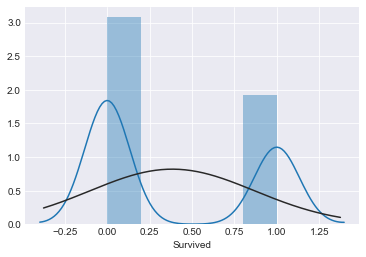

In [117]:
print(train_df['Survived'].describe())
sns.distplot(train_df['Survived'], fit=scipy.stats.norm)

In [118]:
print(train_df.isnull().sum())
cols_with_missing = [col for col in train_df.columns 
                                 if train_df[col].isnull().any()]
print("Columns with missing features: ",  cols_with_missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Columns with missing features:  ['Age', 'Cabin', 'Embarked']


# Treat null values

In [119]:
imputer = sklearn.preprocessing.Imputer()

In [120]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()

def process_data(old_df):
    print(old_df)
    # create a clone
    df = old_df[:]
    # Drop columns where large number of values are null
    columns_to_drop = ['Age', 'Cabin', 'Name', 'Ticket']
    df = df.drop(columns_to_drop, axis=1)

    df[['Embarked']] = df[['Embarked']].fillna(value='None')
    df[['Fare']] = df[['Fare']].fillna(value=0)
    df[['Survived']] = df[['Survived']].fillna(value=0.0)
    
    # categorial features
    cols = ('Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp')
    # shape        
    print('before data_df.shape = ', df.shape)
    # apply sklearn.preprocessing.LabelEncoder to each categorical feature
    for c in cols:
        lbl = sklearn.preprocessing.LabelEncoder() 
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))
    cols = df.select_dtypes(exclude =[np.number]).columns.values
    df  = pd.get_dummies(df).copy()
    return df

In [121]:
df = process_data(train_df)
train_df = df[: train_df.shape[0]]
train_df_y = train_df[['Survived']]
train_df = train_df.drop('Survived', axis=1)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [122]:
model = tree.DecisionTreeClassifier(max_depth=3)

In [123]:
model.fit(train_df, train_df_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [124]:
new_test_df = process_data(test_df)
predictions = model.predict(new_test_df)

     PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jon

KeyError: "['Survived'] not in index"

In [128]:
test_df['Survived'] = predictions
test_df[['PassengerId', 'Survived']].to_csv('submission5.csv', index=False)
print('test df', test_df)

ValueError: Length of values does not match length of index